In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageOps
import numpy as np

### Combining Train and Validation set

In [2]:
def combine_subfolders(src1, src2, dest):
    os.makedirs(dest, exist_ok=True)  
    def move_subdirectories(source):
        for subdir in os.listdir(source):
            full_subdir_path = os.path.join(source, subdir)
            if os.path.isdir(full_subdir_path):  
                dest_subdir_path = os.path.join(dest, subdir)
                
                if os.path.exists(dest_subdir_path):
                    print(f"Directory {subdir} already exists in destination. Skipping...")
                else:
                    shutil.move(full_subdir_path, dest) 
    move_subdirectories(src1)
    move_subdirectories(src2)
    print("Subfolders have been successfully combined.")

train_dir = 'Train'
validation_dir = 'Validation'
combined_dir = 'data'

combine_subfolders(train_dir, validation_dir, combined_dir)


Subfolders have been successfully combined.


In [3]:
csv_file_1 = 'Train.csv'
csv_file_2 = 'Validation.csv'

data1 = pd.read_csv(csv_file_1)
data2 = pd.read_csv(csv_file_2)

combined_data = pd.concat([data1, data2], ignore_index=True)
combined_data.to_csv('data.csv', index=False)


### Delete Original Train, Test and Validation Set

In [4]:
shutil.rmtree('Train')
shutil.rmtree('Test')
shutil.rmtree('Validation')
os.remove('Train.csv')
os.remove('Test.csv')
os.remove('Validation.csv')

### Histogram of the Classes

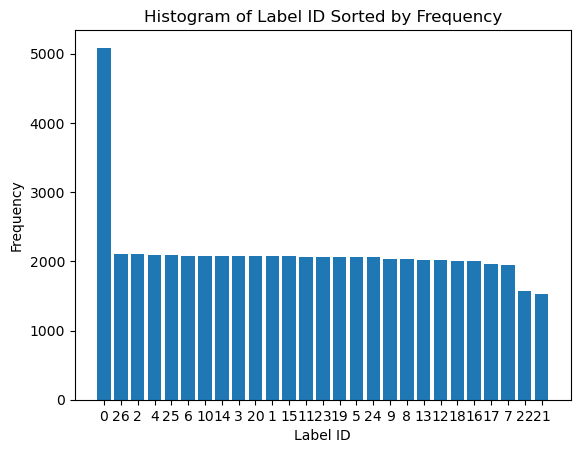

In [5]:
csv_file_path = 'data.csv'
data = pd.read_csv(csv_file_path)

label_counts = data['label_id'].value_counts().sort_values(ascending=False)

plt.bar(label_counts.index.astype(str), label_counts.values)
plt.xlabel('Label ID')
plt.ylabel('Frequency')
plt.title('Histogram of Label ID Sorted by Frequency')
plt.show()

In [6]:
label_pairs = data[['label_id', 'label']].drop_duplicates()

for index, row in label_pairs.iterrows():
    print(f"Label ID: {row['label_id']}, Label: {row['label']}")

Label ID: 0, Label: Doing other things
Label ID: 6, Label: Pushing Two Fingers Away
Label ID: 1, Label: Drumming Fingers
Label ID: 10, Label: Sliding Two Fingers Down
Label ID: 5, Label: Pushing Hand Away
Label ID: 9, Label: Shaking Hand
Label ID: 4, Label: Pulling Two Fingers In
Label ID: 14, Label: Stop Sign
Label ID: 24, Label: Zooming In With Two Fingers
Label ID: 13, Label: Sliding Two Fingers Up
Label ID: 26, Label: Zooming Out With Two Fingers
Label ID: 23, Label: Zooming In With Full Hand
Label ID: 2, Label: No gesture
Label ID: 17, Label: Swiping Right
Label ID: 19, Label: Thumb Down
Label ID: 8, Label: Rolling Hand Forward
Label ID: 3, Label: Pulling Hand In
Label ID: 25, Label: Zooming Out With Full Hand
Label ID: 16, Label: Swiping Left
Label ID: 7, Label: Rolling Hand Backward
Label ID: 22, Label: Turning Hand Counterclockwise
Label ID: 18, Label: Swiping Up
Label ID: 21, Label: Turning Hand Clockwise
Label ID: 11, Label: Sliding Two Fingers Left
Label ID: 15, Label: Swipi

### Delete the Classes to Shrink the Dataset

In [13]:
label_ids_to_remove = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 21, 22, 23, 25]

filtered_data = data[~data['label_id'].isin(label_ids_to_remove)]

filtered_data.to_csv('filtered_data.csv', index=False)

data_folder = 'data'

for video_id in data[data['label_id'].isin(label_ids_to_remove)]['video_id'].unique():
    folder_path = os.path.join(data_folder, str(video_id))
    shutil.rmtree(folder_path)


### Reduce data to one-third for each class

In [5]:
df = pd.read_csv('data.csv')
def sample_one_third(group):
    return group.sample(frac=1/2)
sampled_df = df.groupby('label_id').apply(sample_one_third).reset_index(drop=True)
sampled_df.to_csv('data.csv', index=False)

/tmp/ipykernel_7835/450458375.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('label_id').apply(sample_one_third).reset_index(drop=True)


In [6]:
shuffled_df = sampled_df.sample(frac=1).reset_index(drop=True)
shuffled_df.to_csv('data.csv', index=False)


### Histogram of Selected Classes

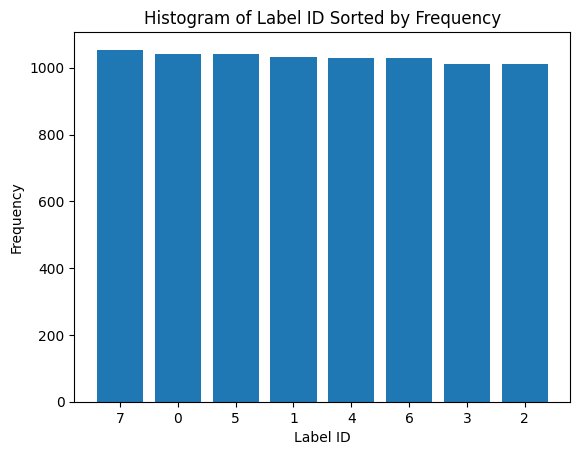

In [7]:
csv_file_path = 'data.csv'
data = pd.read_csv(csv_file_path)

label_counts = data['label_id'].value_counts().sort_values(ascending=False)

plt.bar(label_counts.index.astype(str), label_counts.values)
plt.xlabel('Label ID')
plt.ylabel('Frequency')
plt.title('Histogram of Label ID Sorted by Frequency')
plt.show()

### Shrink Videos by Deleteing Selected Images

In [9]:
def shrink_video(main_folder):
    keep_files = ["00001.jpg", "00004.jpg", "00007.jpg", "00010.jpg", "00013.jpg", 
                  "00016.jpg", "00019.jpg", "00022.jpg", "00025.jpg", "00028.jpg", 
                  "00031.jpg", "00034.jpg", "00037.jpg"]
    
    for subdir in os.listdir(main_folder):
        subdir_path = os.path.join(main_folder, subdir)
        
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                if file.endswith(".jpg") and file not in keep_files:
                    file_path = os.path.join(subdir_path, file)
                    os.remove(file_path)

main_folder = 'data'

shrink_video(main_folder)

### Renaming Frames Sequentially

In [7]:
def rename_files_sequentially(main_folder):
    for subdir, _, files in os.walk(main_folder):
        files.sort()  
        i = 1
        for filename in files:
            if filename.endswith(".jpg"): 
                new_filename = f"{i:05d}.jpg"  
                old_file_path = os.path.join(subdir, filename)
                new_file_path = os.path.join(subdir, new_filename)
                os.rename(old_file_path, new_file_path) 
                i += 1
main_folder = 'data'

rename_files_sequentially(main_folder)

### Reduce the Resolution of the Images

In [15]:
def resize_images(main_folder):
    for subdir in os.listdir(main_folder):
        subdir_path = os.path.join(main_folder, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                with Image.open(file_path) as img:
                    img = img.resize((100, 100), Image.ANTIALIAS)
                    img.save(file_path)
                    
main_folder = 'data'
resize_images(main_folder)

/var/folders/p5/nlkttxd50dxcnyk_j_3_rrg40000gn/T/ipykernel_13475/1632644434.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((100, 100), Image.ANTIALIAS)


### Denoising

In [17]:
def denoise_images(main_folder):
    for subdir in os.listdir(main_folder):
        subdir_path = os.path.join(main_folder, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                with Image.open(file_path) as img:
                    img = img.filter(ImageFilter.MedianFilter(size=3))
                    img.save(file_path)
                    
main_folder = 'data'
denoise_images(main_folder)

### 0-1 Normalization

In [4]:
def normalize_01(source_folder, target_folder):
    os.makedirs(target_folder, exist_ok=True)

    for subdir, _, files in os.walk(source_folder):
        for filename in files:
            if filename.endswith(".jpg"):
                file_path = os.path.join(subdir, filename)
                image = Image.open(file_path)
                image_array = np.asarray(image).astype(float)
                normalized_array = image_array / 255.0
                normalized_image = Image.fromarray(np.uint8(normalized_array * 255))

                relative_path = os.path.relpath(subdir, source_folder)
                target_subfolder = os.path.join(target_folder, relative_path)
                os.makedirs(target_subfolder, exist_ok=True)
                normalized_image.save(os.path.join(target_subfolder, filename))

main_folder = "data"  
target_folder = "data_normalized_01" 
normalize_01(main_folder, target_folder)


### Global Histogram Equalization

In [7]:
def histogram_equalization(source_folder, target_folder):
    os.makedirs(target_folder, exist_ok=True)
    for subdir, _, files in os.walk(source_folder):
        for filename in files:
            if filename.endswith(".jpg"):
                file_path = os.path.join(subdir, filename)
                image = Image.open(file_path).convert('YCbCr')
                y, cb, cr = image.split()
                y_eq = ImageOps.equalize(y)
                result_image = Image.merge('YCbCr', (y_eq, cb, cr)).convert('RGB')
                
                relative_path = os.path.relpath(subdir, source_folder)
                target_subfolder = os.path.join(target_folder, relative_path)
                os.makedirs(target_subfolder, exist_ok=True)
                result_image.save(os.path.join(target_subfolder, filename))

main_folder = "data" 
target_folder = "data_he" 
histogram_equalization(main_folder, target_folder)


## Grayscale

In [8]:
def convert_grayscale(source_folder, target_folder):
    os.makedirs(target_folder, exist_ok=True)
    for subdir, _, files in os.walk(source_folder):
        for filename in files:
            if filename.endswith(".jpg"):
                file_path = os.path.join(subdir, filename)
                image = Image.open(file_path)
                gray_image = image.convert('L')
                
                relative_path = os.path.relpath(subdir, source_folder)
                target_subfolder = os.path.join(target_folder, relative_path)
                os.makedirs(target_subfolder, exist_ok=True)
                gray_image.save(os.path.join(target_subfolder, filename))

main_folder = "data" 
target_folder = "data_gray" 
convert_grayscale(main_folder, target_folder)


### Map labels

In [2]:
df = pd.read_csv('data.csv')
label_id_mapping = {
    10: 0, 11: 1, 12: 2, 13: 3,
    19: 4, 20: 5, 24: 6, 26: 7
}
df['label_id'] = df['label_id'].map(label_id_mapping)

df.to_csv('data.csv', index=False)